# Laboratorio 4: Regresión y agrupamiento

Antes de empezar, se importan todas las librerías necesarias para la realización de las prácticas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, pairwise_distances
from sklearn.linear_model import LinearRegression

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

import statsmodels.api as sm

# Práctica 1: Regresión Lineal Simple
**Objetivo de la práctica**

Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros, densidad, tipo de vino, sulfatos y pH).

Para ello han construido un dataset, denominado wine_alcohol.csv, que contiene la información de todos los
vinos que han sido producidos en los últimos años.

---
---

En primer lugar, importaremos y guardaremos el dataset en una variable:

In [2]:
data = pd.read_csv( 'wine_alcohol.csv', sep = ';')

data

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,2,11.2
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,2,9.6
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,2,9.4
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,2,12.8


Este dataset consta de 13 variables,sin contar con id, todas relacionadas con el vino:


*   **Fixed acidity**: Es la cantidad de ácidos fijos en el vino. Contribuye a la acidez total del vino y puede afectar su sabor y estabilidad.
*   **Volatile acidity**: Es la cantidad de ácidos volátiles en el vino. En concentraciones altas, puede hacer que el vino tenga un sabor agrio o avinagrado.
*   **Citric acid**: Es el ácido cítrico presente en el vino. Contribuye al sabor y la frescura del vino.
*   **Residual sugar**: Es la cantidad de azúcar que queda en el vino después de la fermentación. Contribuye al sabor dulce del vino.
*   **Chlorides**: Es la cantidad de cloruros presentes en el vino. En concentraciones altas, puede afectar negativamente el sabor del vino.
*   **Free sulfur dioxide**: Es la cantidad de dióxido de azufre libre en el vino. Actúa como conservante y antioxidante.
*   **Total sulfur dioxide**: Es la cantidad total de dióxido de azufre (libre y combinado) en el vino. También actúa como conservante y antioxidante.
*   **Density**: Es la densidad del vino, que está relacionada con su contenido de alcohol y azúcar.
*   **pH**: Es una medida de la acidez o alcalinidad del vino. Un pH bajo indica acidez, mientras que un pH alto indica alcalinidad.
*   **Sulphates**: Es la cantidad de sulfatos presentes en el vino. Pueden contribuir al aroma y la estabilidad del vino.
*   **Quality**: Es una medida subjetiva de la calidad del vino donde valores más altos indican mejor calidad.
*   **Wine type**: Es el tipo de vino.
*   **Alcohol**: Es el contenido de alcohol en el vino. Contribuye al sabor y la fuerza del vino.

Para empezar vamos a limpiar los datos, en primer lugar veremos si hay valores NaN:

In [3]:
data.isnull().sum()

id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
wine type               0
alcohol                 0
dtype: int64

Una vez que vemos que todos los datos están rellenos, veremos si hay filas duplicadas y las eliminaremos:

In [4]:
data = data.drop_duplicates()
data

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,1,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,2,11.2
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,2,9.6
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,2,9.4
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,2,12.8


Una vez que hemos limpiado los datos, crearemos una matriz de correlación con todos ellos para ver qué características se relacionan mejor con aquella que queremos predecir, `'alcohol'`:

In [5]:
corr = data.corr()
corr

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
id,1.000000,-0.392728,-0.322390,-0.016213,0.177000,-0.287370,0.228966,0.250558,-0.349115,-0.233094,-0.246635,0.090772,0.494506,0.197157
fixed acidity,-0.392728,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.076743,-0.486740,-0.095452
volatile acidity,-0.322390,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.265699,-0.653036,-0.037640
citric acid,-0.016213,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,0.085532,0.187397,-0.010493
residual sugar,0.177000,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.036980,0.348821,-0.359415
chlorides,-0.287370,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.200666,-0.512678,-0.256916
free sulfur dioxide,0.228966,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,0.055463,0.471644,-0.179838
total sulfur dioxide,0.250558,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.041385,0.700357,-0.265740
density,-0.349115,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.305858,-0.390645,-0.686745
pH,-0.233094,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.019506,-0.329129,0.121248


Vamos a hacer un estudio de cada una de las variables del Dataset y vamos a ver con cuáles tienen mejor relación y qué tipo, es decir, si es directa o inversa:

*   En primer lugar observamos que la variable wine type guarda una relación inversa del 48,67% con fixed acidity.
*   Volatile acidity guarda una relación inversa del 65,3% con wine type.
*   Citric acid guarda una relación inversa del 37,79% con volatile acidity.
*   Residual sugar guarda una relación directa del 55,25% con density.
*   Wine type guarda una relación inversa del 51,26% con chlorides.
*   Free sulfur dioxide guarda una relación directa del 72,09% con total sulfur dioxide.
*   Density guarda una relación inversa del 68,67% con alcohol.
*   PH guarda una relación inversa del 32,98% con citric acid.
*   Wine type guarda una relación inversa del 48,72% con sulphates.
*   Alcohol guarda una relación directa del 44,43% con quality.
*   Wine type guarda una relación directa del 70,03% con total sulfur dioxide.

Si observamos, la variable que destaca es Wine type pues es la variable que guarda mejor relación con la mayoría de atributos: fixed acidity, volatile acidity, chlorides, sulphates y total sulfur dioxide.



Debemos de elegir los dos atributos que guarden mayor relación con la variable objetivo `alcohol`, para ello nos fijaremos en el valor absoluto de cada uno de los valores que hay en la fila alcohol de la matriz de correlaciones , un valor alto indica una mayor relación entre ambas variables, el signo indica el tipo de relación, si es positivo guardarán una relación directa (por ejemplo, cuanto más alcohol, más calidad) y si el signo es negativo guardarán una relación inversa (por ejemplo, cuanto más alcohol, menos ácido cítrico).

En este caso, si observamos la matriz de correlaciones, los dos atributos que guardan mayor relación con la variable `alcohol`:



1.   En primer lugar contamos con el atributo `density` que se refiere a su masa por unidad de volumen y puede ser utilizada como una indicación de la concentración de azúcares y alcohol presentes en el vino. Siguiendo la matriz de correlaciones, se relaciona de manera inversa, con una relación del 68,67%.
2.   Por último, emplearemos el atributo `quality` que se refiere a la calidad del vino. Siguiendo la matriz de correlaciones, se relaciona de manera directa, con una relación del 44,43%.





Como vamos a realizar un modelo de regresión lineal para estudiar la variable `alcohol`, debemos elegir uno de los dos atributos. En este caso, nos decantaremos por el atributo `density` ya que aunque ambos guardan buena relación, la densidad guarda más relación que la calidad, pero sin ser lo suficientemente alta como para considerarlos correlacionadas.


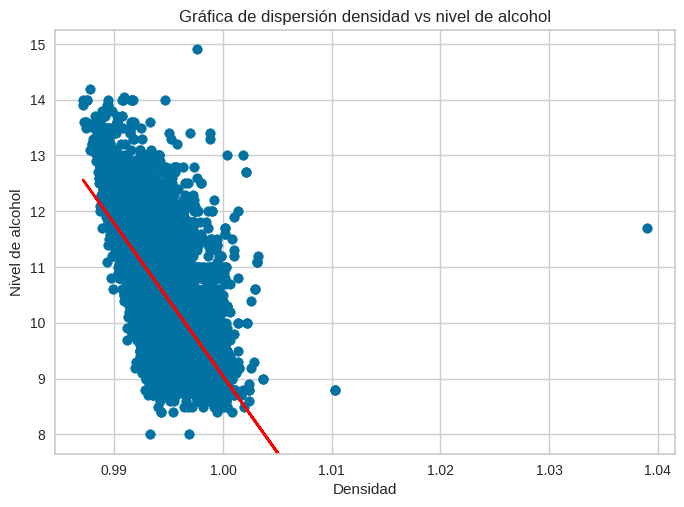

In [6]:
plt.scatter(data['density'], data['alcohol'])
plt.xlabel('Densidad')
plt.ylabel('Nivel de alcohol')
plt.title('Gráfica de dispersión densidad vs nivel de alcohol')
plt.axis('tight')

# Ajustar el modelo de regresión lineal
regressor = LinearRegression()
X = data['density'].values.reshape(-1, 1)
y = data['alcohol'].values.reshape(-1, 1)
regressor.fit(X, y)
p = regressor.predict(X)

# Trazar la línea de regresión lineal
plt.plot(X, p, color = 'red')
plt.show()

A continuación, veremos el error que presenta el modelo calculado:

In [7]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(data['alcohol'], p)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(data['alcohol'], p)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(data['alcohol'], p)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 0.7515382881151359
Error absoluto medio (MAE): 0.6706838585236337
Coeficiente de determinación (R^2): 0.4716192742013742




1.   **Error cuadrático medio (MSE)**: Es la media de los errores al cuadrado entre las predicciones del modelo y los valores reales de la variable objetivo. En este caso hemos obtenido un valor alto, un 75,15%, esto quiere decir que las predicciones del modelo están desviadas de los valores reales en 0.75 unidades al cuadrado.
2.   **Error absoluto medio (MAE)**: Es la media de los valores absolutos de los errores entre las predicciones del modelo y los valores reales de la variable objetivo. El error obtenido es del 67,07%, lo que quiere decir que  las predicciones del modelo están desviadas de los valores reales en 0.67 unidades.
3.   **Coeficiente de determinación (R^2)**: Es una medida de cuánta variabilidad en la variable objetivo es explicada por el modelo. Un R^2 de 0.47 significa que aproximadamente el 47% de la variabilidad en el contenido de alcohol puede ser explicada por la densidad.

El valor de R^2 es moderado, lo que indica que el modelo explica una parte significativa de la variabilidad en la variable objetivo, pero aún hay margen para mejorar el ajuste del modelo a los datos.





# Práctica 2: Regresión lineal múltiple

**Objetivo de la práctica**

La empresa productora de vinos cree que es posible construir un modelo de mejor calidad que pueda predecir mejor el grado de alcohol de los futuros vinos si se utilizan varios atributos del dataset. Para ello se solicita la creación de nuevos modelos.

---
---

Habiendo preparado el dataset anteriormente, se procede al análisis de las variables para determinar las más apropiadas para definir el modelo y proceder a la division de los conjuntos de entrenamiento y test. Para ello, se estudia la correlación entre la variable `alcohol` (como variable objetivo) y las otras variables.

<Axes: >

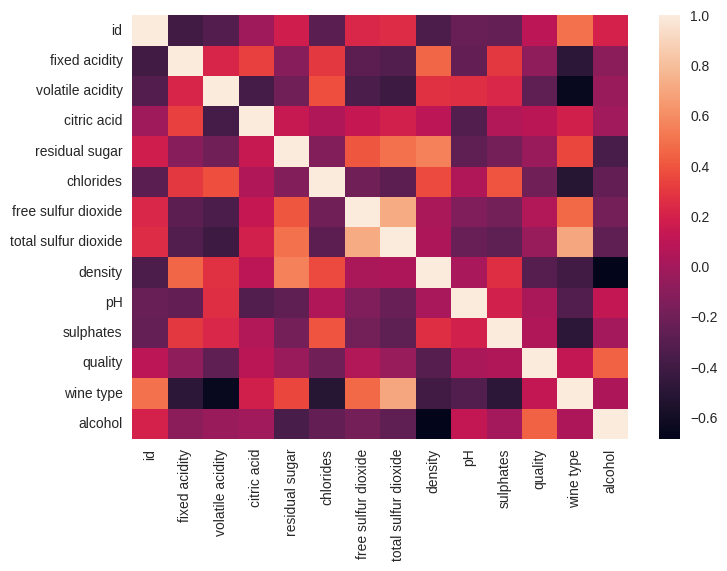

In [8]:
corr = data.corr()
sns.heatmap(corr)

Para poder verlo con mayor claridad se muestran únicamente los cuatro elementos con mayor relación respecto a la variable `alcohol`. Teniendo en cuenta que cuanto más cercano esté el valor absoluto de este número a `1`, mayor será la relación entre ellas.

In [9]:
alcohol = pd.DataFrame(abs(corr.loc['alcohol']).sort_values())
alcohol = alcohol.drop(index = 'alcohol').tail(4)
for i in alcohol.index:
  if corr.loc[i, 'alcohol'] < 0:
    alcohol.loc[i] = -alcohol.loc[i]
alcohol

,alcohol
total sulfur dioxide,-0.265740
residual sugar,-0.359415
quality,0.444319
density,-0.686745


Una vez obtenidas las variables más relacionadas se puede proceder a crear los conjuntos de test y entrenamiento.

Se dividen los datos en variable independiente (`alcohol`) y variables dependientes (`density`, `quality`, `residual sugar`, `total sulfur dioxide`). Después se dividen estas variables en dos conjuntos, uno de entrenamiento y otro de test, para poder entrenar y estudiar la validez del modelo planteado.

In [10]:
X = data[['density', 'quality', 'residual sugar', 'total sulfur dioxide']]
y = data['alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 50)

print('Entrenamiento:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Entrenamiento: (5197, 4) (5197,)
Test: (1300, 4) (1300,)


Se define el modelo de regresión lineal. Se utiliza el parámetro `fit_intercept` que define si se calcula la intersección con el eje. Además, se emplea un validación cruzada con una división en 5 partes iguales de los datos, realizando el proceso de entrenamiento y test 5 veces, y aplicando la métrica de error cuadrático medio negativo. Esto quiere decir que se buscan los valores de los parámetros que minimicen el error cuadrático medio.

Por último, se selecciona el mejor modelo y se calculan las predicciones para el conjunto de test.

In [11]:
modelo = LinearRegression()
modelo = GridSearchCV(modelo, {'fit_intercept': [True, False]},
                      cv = 5, scoring = 'neg_mean_squared_error')

modelo.fit(X_train, y_train)

best = modelo.best_estimator_

y_pred = best.predict(X_test)

Una vez realizadas las predicciones de los nuevos valores, se calcula el error de cada predicción.

In [12]:
# Calcular el error cuadrático medio (MSE)
mse1 = mean_squared_error(y_test, y_pred)

# Calcular el error absoluto medio (MAE)
mae1 = mean_absolute_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R^2)
r21 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse1)
print("Error absoluto medio (MAE):", mae1)
print("Coeficiente de determinación (R^2):", r21)

Error cuadrático medio (MSE): 0.5442883778488942
Error absoluto medio (MAE): 0.5785690484064879
Coeficiente de determinación (R^2): 0.6272710406745219


Antes de calcular los intervalos de confianza para los coeficientes se tiene que añadir una constante al conjunto X de forma que quede representada la variable independiente. Después, se ajusta el modelo mediante los mínimos cuadrados ordinarios y de ahí, se obtienen los intervalos.

In [13]:
X = sm.add_constant(X)

model_ols = sm.OLS(y, X).fit()

ci = model_ols.conf_int(alpha = 0.25)
print(ci)

                               0           1
const                 295.105487  304.835588
density              -297.055628 -287.328277
quality                 0.278727    0.305003
residual sugar          0.053081    0.059801
total sulfur dioxide   -0.007506   -0.007040


## Comparación de los modelos

In [14]:
error = pd.DataFrame({'simple': [mse, mae, r2], 'múltiple': [mse1, mae1, r21]},
                     index = ['mse', 'mae', 'r2'])
error

,simple,múltiple
mse,0.751538,0.544288
mae,0.670684,0.578569
r2,0.471619,0.627271


Los errores obtenidos con el modelo de regresión múltiple son menores que los del modelo simple (mse: `0.54<0.75`, mae: `0.57<0.67`). Además, el valor del coeficiente de determinación es mayor en el modelo múltiple, es decir, este modelo explica un 63% de la variabilidad en el contenido de alcohol con respecto al 47% del modelo simple.

Esto quiere decir que, al incluir un mayor número de variables dependientes en el modelo de regresión se pueden obtener resultados de predicción más cercanos a los valores reales.

# Práctica 3: Agrupamiento
**Objetivo de la práctica**

La empresa productora de vinos no está segura de que la empresa de analiza la calidad de los diferentes vinos esté realizando el trabajo adecuadamente por lo que ha decidido analizar si los diferentes vinos que han sido producidos en los últimos años realmente tienen la calidad identificada.

Para ello se debe aplicar un algoritmo de agrupamiento para comprobar si los vinos realmente se agrupan de manera similar a como han sido valorados por la empresa evaluadora (quality).

---
---

Primero, se eliminan las variables `id` y `wine type`, por ser variables que no se pueden emplear en algoritmos de agrupamiento basados en distancias. Además, se estandarizan los valores de cada registro.

In [15]:
data = data.drop(columns = ['id', 'wine type'])

scaler = MinMaxScaler()

for col in data.columns:
  data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.333333,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.333333,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.333333,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.500000,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.333333,0.202899


Para establecer el número óptimo de clústeres que se elegirán se utilizará el criterio del codo. Esto nos mostrará cúal es el número óptimo de clústeres entre 1 y 15 mediante la suma de cuadrados.

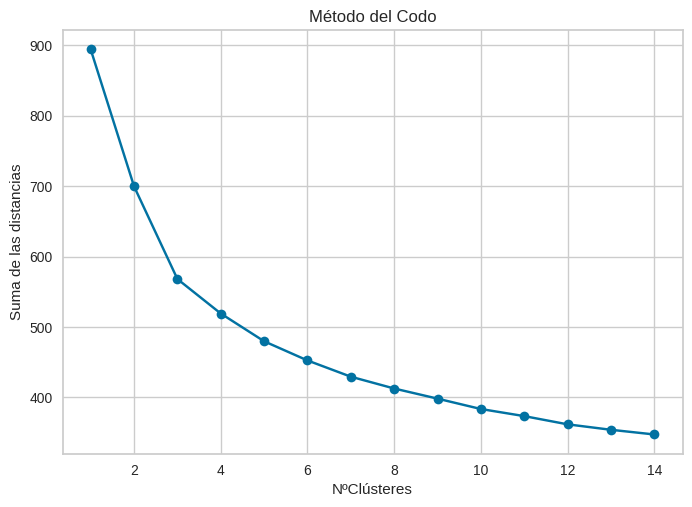

In [16]:
suma = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init = 10)
    kmeans.fit(data)
    suma.append(kmeans.inertia_)

plt.plot(range(1, 15), suma, 'o-')
plt.xlabel('NºClústeres')
plt.ylabel('Suma de las distancias')
plt.title('Método del Codo')
plt.show()

Una vez tenemos la gráfica, hay que fijarse dónde se produce el 'codo'. En este caso, podemos observar que el 'codo' se encuentra en el clúster 3. Aun así, vamos a aplicar el método de la silueta para confirmar cúal es. Este método  mide "la distancia de separación entre los grupos resultantes" y toma valores entre -1 y 1, donde "1 significa que los puntos están muy cerca de su propio clúster y lejos de otros clústeres mientras que -1 indica que los puntos están cerca de los clústeres vecinos".

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(max_iter=100, n_clusters=2, n_init=10,
                                      random_state=42))

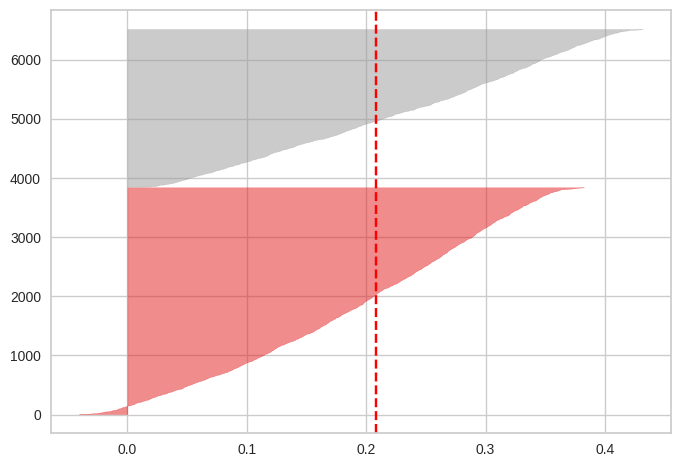

In [17]:
km = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(data)

En este caso, ambos grupos superan a la media y tienen tamaños parecidos.

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(max_iter=100, n_clusters=3, n_init=10,
                                      random_state=42))

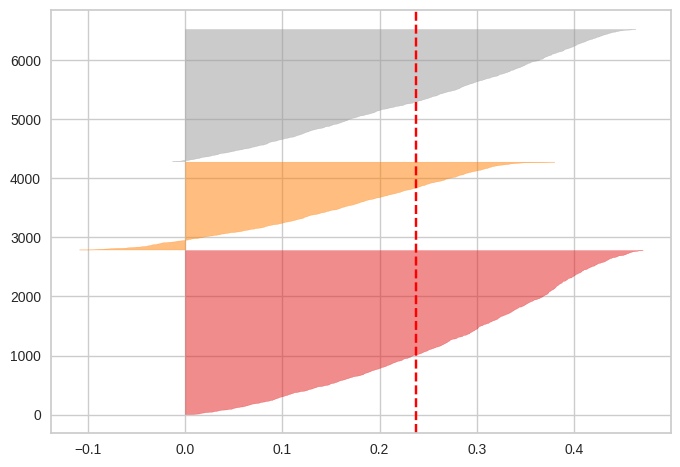

In [18]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(data)

Si trabajamos con 3 clústeres, observamos que, al igual que pasa con k = 2, todos los grupos llegan a la media, sin embargo, en este caso el tamaño del segundo clúster es bastante menor a los otros dos. Por lo tanto escogeremos 2 clústeres.

En primer lugar, emplearemos el algoritmo KMedias para agrupar los datos en 2 clústeres:

In [19]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

Se añaden las etiquetas del clúster al dataset.

In [20]:
data['cluster'] = kmeans.labels_
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,cluster
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.333333,0.202899,0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.333333,0.260870,0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.333333,0.260870,0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.500000,0.260870,0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.333333,0.202899,0


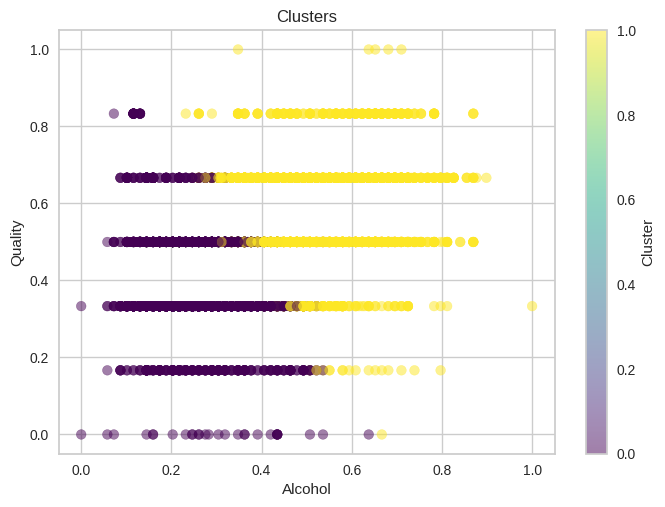

In [21]:
plt.scatter(data['alcohol'], data['quality'], c = data['cluster'],
            cmap = 'viridis', alpha = 0.5)
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Clusters')
plt.colorbar(label = 'Cluster')
plt.show()

Por lo que se puede observar, los elementos del clúster 0 tienen valores menores en la categoría `quality`, mientras que los elementos del clúster 1 tienden a valores más altos de esta categoría.

Para conocer la diferencia entre los clústeres hay que calcular la distancia entre ellos.

In [22]:
dist_centroides = pairwise_distances(kmeans.cluster_centers_)
print('La distancia entre el clúster 0 y 1 es', dist_centroides[0, 1])

La distancia entre el clúster 0 y 1 es 0.3515347846376759


Esta distancia entre clústeres es pequeña, por tanto, se puede decir que no hay mucha diferencia con los registros de un grupo con el otro.

# Práctica 4: Agrupamiento
**Objetivo de la práctica**

La empresa productora de vinos desea mejorar el proceso de producción de sus vinos con el objetivo de
mejorar las futuras producciones.
Para ello han pensado en utilizar un algoritmo de agrupamiento jerárquico para segmentar los diferentes vinos
en base a sus componentes, calidad y nivel de alcohol.

---
---

Como se quiere segmentar los diferentes vinos en base a la calidad y el nivel de alcohol, crearemos un nuevo dataset compuesto solo por las columnas `quality` y `alcohol`.

In [23]:
datos = data[['quality', 'alcohol', 'cluster']]
datos.head()

,quality,alcohol,cluster
0,0.333333,0.202899,0
1,0.333333,0.260870,0
2,0.333333,0.260870,0
3,0.500000,0.260870,0
4,0.333333,0.202899,0


Calculamos la distancia desde cada punto al centroide:

In [24]:
distancias = kmeans.transform(data.drop(columns = 'cluster'))
distancias

array([[0.45933073, 0.59017956],
       [0.44562794, 0.58192531],
       [0.38996055, 0.52801153],
       ...,
       [0.26783342, 0.40452487],
       [0.5949705 , 0.27868274],
       [0.42300136, 0.20306017]])

Por último, seleccionamos los 10 ejemplos más representativos de cada clúster, en este caso nos fijaremos en las distancias, cuanto menor sea, mejor.

In [25]:
ejemplos = []

for i in range(2):  # Para cada clúster
    indices = np.argsort(distancias[:, i])[:10]  # Obtener los índices de los 10 ejemplos más cercanos
    ejemplos.append(datos.iloc[indices])

# Almacenar los ejemplos seleccionados en un nuevo dataset
df = pd.DataFrame(np.concatenate(ejemplos), columns = datos.columns)
df

,quality,alcohol,cluster
0,0.333333,0.188406,0.0
1,0.333333,0.188406,0.0
2,0.333333,0.202899,0.0
3,0.333333,0.202899,0.0
4,0.333333,0.275362,0.0
5,0.500000,0.260870,0.0
6,0.333333,0.173913,0.0
7,0.333333,0.173913,0.0
8,0.333333,0.231884,0.0
9,0.333333,0.202899,0.0


Una vez que tenemos los 10 mejores ejemplos por cada clúster, vamos a proceder al agrupamiento jerárquico. Para ello, vamos emplear la distancia Hamming:

In [26]:
# Creamos una instancia del modelo AgglomerativeClustering
modelo = AgglomerativeClustering(n_clusters = 2, affinity = 'hamming', linkage = 'complete')

# Ajustamos el modelo a los datos
modelo.fit(datos[['quality', 'alcohol']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='hamming', linkage='complete')

Generamos los diferentes clústeres en base a los atributos seleccionados:

In [27]:
datos.loc[:, 'cluster'] = modelo.labels_
datos.head()

,quality,alcohol,cluster
0,0.333333,0.202899,0
1,0.333333,0.260870,0
2,0.333333,0.260870,0
3,0.500000,0.260870,1
4,0.333333,0.202899,0


Hacemos un recuento:

In [28]:
(d, counts) = np.unique(list(modelo.labels_), return_counts = True)

dt = pd.DataFrame({'Clúster': np.unique(list(modelo.labels_)),
                   'Nº Elementos': counts})
dt

,Clúster,Nº Elementos
0,0,3661
1,1,2836


En este caso, ambos clústeres tienen cantidades similares (el clúster 1 con 2836 elementos y el clúster 0 con 3661 elementos).

Finalmente, dibujaremos el dendograma con los clústeres obtenidos.

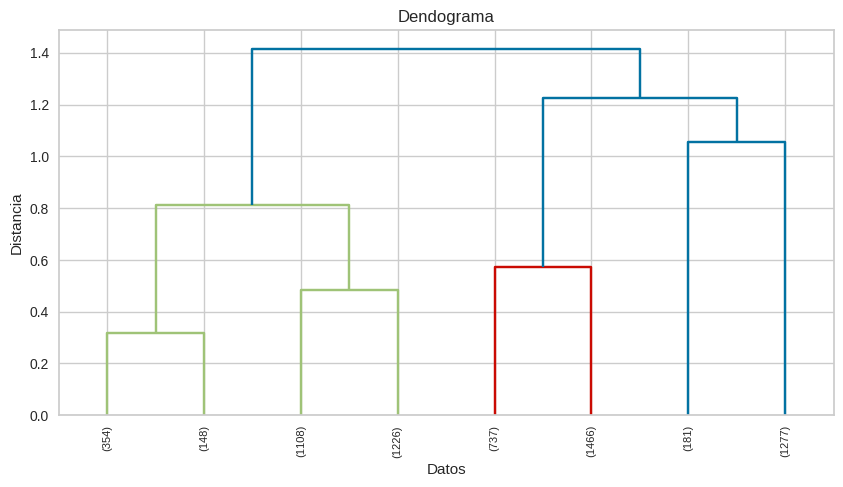

In [29]:
matriz = linkage(datos, method = 'complete')
plt.figure(figsize = (10, 5))
dendrogram(matriz, truncate_mode = 'level', p = 2, leaf_rotation = 90.,
           leaf_font_size = 8., color_threshold = None)
plt.title('Dendograma')
plt.xlabel('Datos')
plt.ylabel('Distancia')
plt.show()

Finalmente, se obtienen tres clústeres (verde, rojo y azul) con tamaños dispares. El primer clúster engloba más elementos que los otros dos.